This is a notebook used to analysis constclust results. The majority of constclust is run on hpc.

In [1]:
from constclust import cluster, reconcile, plotting

import scanpy as sc
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
output_notebook()

from sklearn.metrics import adjusted_rand_score

Loading BokehJS ...

Reading in constclust data

In [2]:
params = pd.read_pickle("/Users/pwangel/Data/Single_Cell/Gut_Colon/params.pkl")
clusterings = pd.read_pickle("/Users/pwangel/Data/Single_Cell/Gut_Colon/clusterings.pkl")

data = sc.read_h5ad('/Users/pwangel/Data/Single_Cell/Gut_Colon/Colon_cell_atlas_scrublet.h5ad')

In [34]:
blah = pd.DataFrame.sparse.from_spmatrix(data.X[sel,:], index=data.obs_names.values[sel], columns=data.var_names.values).transpose()

In [33]:
blah

,FAM87B,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,...,AC141272.1,AC011043.1,AL592183.1,AC007325.4,AC007325.2,AL354822.1,AC004556.1,AC233755.2,AC233755.1,AC240274.1
AAACCTGCACCTCGTT-1-4861STDY7135911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.166254,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
AAACCTGTCTCACATT-1-4861STDY7135911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,1.369288,0.0,0.000000,0.0,0.0,0.0,0.0
AAACCTGTCTTGCATT-1-4861STDY7135911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.471780,0.0,0.000000,0.0,0.0,0.0,0.0
AAACGGGCAGCGTTCG-1-4861STDY7135911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,1.565788,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
AAACGGGTCGCTGATA-1-4861STDY7135911,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTAGAGGAA-1-4861STDY7135918,0.0,0.0,0.0,0.0,0.317634,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
TTTGTCAGTTAAAGAC-1-4861STDY7135918,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.284164,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
TTTGTCATCATGTCCC-1-4861STDY7135918,0.0,0.0,0.0,0.0,0.369029,0.0,0.0,0.0,0.0,0.369029,...,0.0,0.0,0.369029,0.000000,0.0,0.369029,0.0,0.0,0.0,0.0
TTTGTCATCGCTTAGA-1-4861STDY7135918,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.345680,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


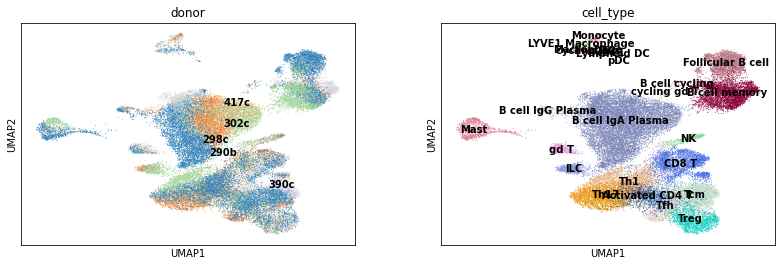

In [17]:
sc.pl.umap(data, color=['donor', 'cell_type'], legend_loc='on data')

In [3]:
clusterings.index = clusterings.index.astype(str)

In [5]:
%%time
rec = reconcile(params, clusterings)
rec

CPU times: user 8.87 s, sys: 1.62 s, total: 10.5 s
Wall time: 10.7 s


<Reconciler 720 clusterings, 108580 clusters, 41650 cells>

<AxesSubplot:ylabel='Count'>

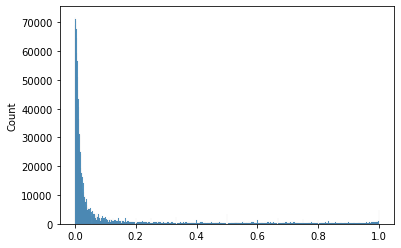

In [23]:
plotting.edge_weight_distribution(rec)

In [6]:
%%time
comps = rec.get_components(0.98)

CPU times: user 3.75 s, sys: 90.4 ms, total: 3.84 s
Wall time: 4 s


In [11]:
comps

component
0       <Component n_solutions=425, max_cells=1162, mi...
1       <Component n_solutions=396, max_cells=672, min...
2       <Component n_solutions=359, max_cells=765, min...
3       <Component n_solutions=294, max_cells=143, min...
4       <Component n_solutions=188, max_cells=268, min...
                              ...                        
1393    <Component n_solutions=2, max_cells=3, min_cel...
1394    <Component n_solutions=2, max_cells=2, min_cel...
1395    <Component n_solutions=2, max_cells=2, min_cel...
1396    <Component n_solutions=2, max_cells=2, min_cel...
1397    <Component n_solutions=2, max_cells=2, min_cel...
Length: 1398, dtype: object

In [7]:
show(
    comps.filter(min_solutions=50, min_intersect=10).plot_hierarchies(data.obsm['X_umap']))

In [26]:
comps.describe().sort_values("n_solutions", ascending=False)  # Looking at some statistics

,n_solutions,n_intersect,n_union
component,,,
0,425,1140,1162
1,396,653,672
2,359,690,765
3,294,126,143
4,188,242,268
...,...,...,...
799,2,111,111
800,2,110,111
801,2,110,111


<AxesSubplot:xlabel='n_solutions', ylabel='n_intersect'>

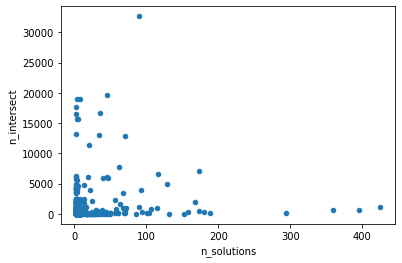

In [27]:
comps.describe().plot.scatter("n_solutions", "n_intersect")

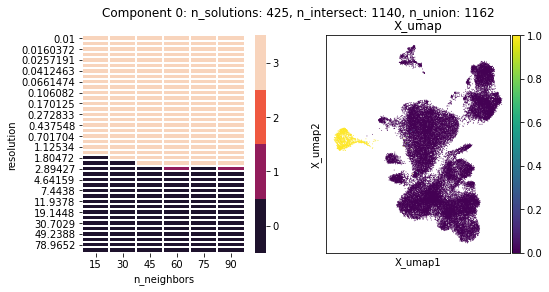

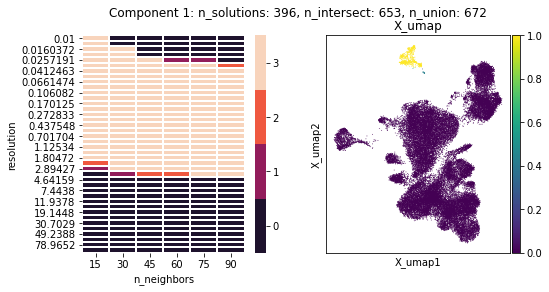

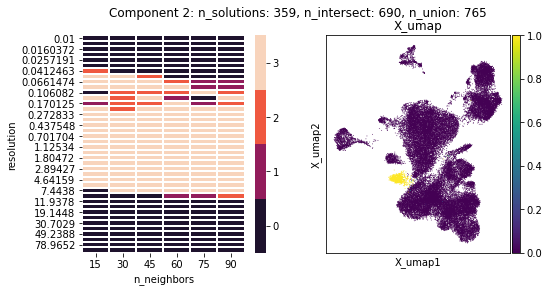

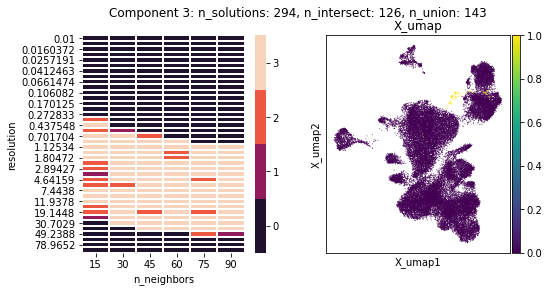

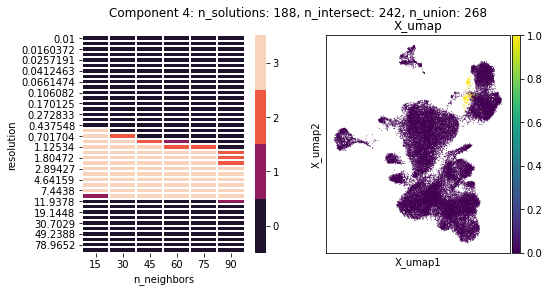

In [37]:
comps[:5].plot_components(data)

In [35]:
comps[0].settings

,n_neighbors,resolution,random_state
clustering,,,
0,15,0.010000,0
1,15,0.012664,0
2,15,0.016037,0
3,15,0.020309,0
4,15,0.025719,0
...,...,...,...
699,90,0.888624,2
700,90,1.125336,2
701,90,1.425103,2
